In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [26]:
def get_mta_data(weeks):
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    df_list = []
    for week in weeks:
        df_list.append(pd.read_csv(url.format(week)))
    return pd.concat(df_list)

In [28]:
mta_df = get_mta_data([160507, 160514, 160521, 160528])

In [29]:
#dups = mta_df[(mta_df['STATION'] == '34 ST-PENN STA')&(mta_df['LINENAME'] == '123ACE')]
#mta_df.drop(dups.index,inplace=True)
mta_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802,1910254
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974,1910328
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996,1910333
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021,1910358
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113,1910427


In [30]:
def get_entries(mta_df):
    d = {}
    turnstile_d = {}
    for row in mta_df.itertuples():
        C_A, unit, scp, station, linename = row[1], row[2], row[3], row[4], row[5]
        date = row[7]
        entries = row[10]
        k = (C_A, unit, scp, station, linename, date)
        if k not in d:
            d[k] = [entries]
        else:
            d[k].append(entries)
    for key, value in d.items():
        entry = abs(max(value) - min(value))
        turnstile_d[key] = [entry]
    return turnstile_d

In [31]:
d = get_entries(mta_df)

In [32]:
dict_df = pd.DataFrame.from_dict(d, orient='index')
dict_df.rename(columns = {0:'Entries'}, inplace=True)
dict_df.head(10)

,Entries
"(A002, R051, 02-00-00, 59 ST, NQR456, 04/30/2016)",861
"(A002, R051, 02-00-00, 59 ST, NQR456, 05/01/2016)",623
"(A002, R051, 02-00-00, 59 ST, NQR456, 05/02/2016)",1463
"(A002, R051, 02-00-00, 59 ST, NQR456, 05/03/2016)",1471
"(A002, R051, 02-00-00, 59 ST, NQR456, 05/04/2016)",1532
"(A002, R051, 02-00-00, 59 ST, NQR456, 05/05/2016)",1431
"(A002, R051, 02-00-00, 59 ST, NQR456, 05/06/2016)",1554
"(A002, R051, 02-00-01, 59 ST, NQR456, 04/30/2016)",765
"(A002, R051, 02-00-01, 59 ST, NQR456, 05/01/2016)",647
"(A002, R051, 02-00-01, 59 ST, NQR456, 05/02/2016)",1222


In [52]:
turnstile_df = pd.DataFrame(columns=[])
turnstile_df['C/A'] = [row[0][0] for row in dict_df.itertuples()]
turnstile_df['Unit'] = [row[0][1] for row in dict_df.itertuples()]
turnstile_df['SCP'] = [row[0][2] for row in dict_df.itertuples()]
turnstile_df['Station'] = [row[0][3] for row in dict_df.itertuples()]
turnstile_df['Linename'] = [row[0][4] for row in dict_df.itertuples()]
turnstile_df['Date'] = [row[0][5] for row in dict_df.itertuples()]
turnstile_df['Entries'] = [row[1] for row in dict_df.itertuples()]

In [53]:
turnstile_df.head(10)

,C/A,Unit,SCP,Station,Linename,Date,Entries
0,A002,R051,02-00-00,59 ST,NQR456,04/30/2016,861
1,A002,R051,02-00-00,59 ST,NQR456,05/01/2016,623
2,A002,R051,02-00-00,59 ST,NQR456,05/02/2016,1463
3,A002,R051,02-00-00,59 ST,NQR456,05/03/2016,1471
4,A002,R051,02-00-00,59 ST,NQR456,05/04/2016,1532
5,A002,R051,02-00-00,59 ST,NQR456,05/05/2016,1431
6,A002,R051,02-00-00,59 ST,NQR456,05/06/2016,1554
7,A002,R051,02-00-01,59 ST,NQR456,04/30/2016,765
8,A002,R051,02-00-01,59 ST,NQR456,05/01/2016,647
9,A002,R051,02-00-01,59 ST,NQR456,05/02/2016,1222


In [54]:
def delete_outliers(df, iters=5):
    '''
    finds the max values in a dataframe grouped by columns
    input a data frame
    iters = number of outliers to delete
    '''
    for i in range(iters):
        to_delete_rows = df.loc[df.groupby(["Station","Linename"])['Entries'].idxmax()]
        to_delete_indices = list(to_delete_rows.index.values)
        df.drop(to_delete_indices, inplace=True)
    return df

**Increase iters to 7 to eliminate outliers

In [55]:
no_outliers_turnstile_df = delete_outliers(turnstile_df, iters=7)
no_outliers_turnstile_df['Entries'].max()

7745

In [56]:
pd.to_datetime(no_outliers_turnstile_df['Date'])
no_outliers_turnstile_df.groupby(['Linename', 'Station']).sum().sort_values(by='Entries',ascending=False).head(10)

busiest_turnstile_df = no_outliers_turnstile_df.groupby(['Linename','Station']).sum()
busiest_turnstile_df = busiest_turnstile_df.sort_values(by='Entries',ascending=False)[:10]
busiest_turnstile_df.reset_index(inplace=True)
busiest_turnstile_df

,Linename,Station,Entries
0,4567S,GRD CNTRL-42 ST,3175877
1,BDFMNQR,34 ST-HERALD SQ,2570093
2,ACENQRS1237,42 ST-PORT AUTH,1979473
3,ACE,34 ST-PENN STA,1771037
4,1237ACENQRS,TIMES SQ-42 ST,1710052
5,LNQR456,14 ST-UNION SQ,1558496
6,456,86 ST,1434368
7,7,FLUSHING-MAIN,1374648
8,123ACE,34 ST-PENN STA,1232569
9,ABCD1,59 ST COLUMBUS,1220028


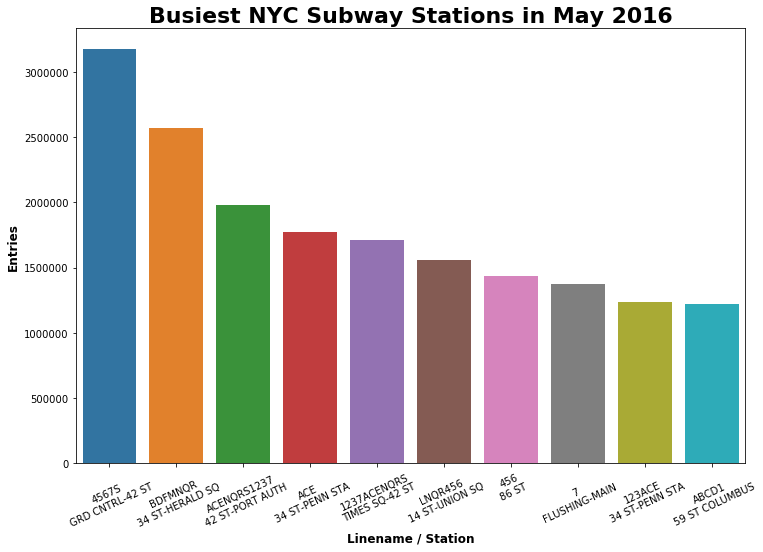

In [57]:
plt.figure(figsize=(12,8))
sb.barplot(busiest_turnstile_df['Linename'] + '\n' + busiest_turnstile_df['Station'], busiest_turnstile_df['Entries'])
plt.title('Busiest NYC Subway Stations in May 2016',fontsize=22, weight='bold')
plt.xlabel('Linename / Station', fontsize=12, weight='bold')
plt.ylabel('Entries', fontsize=12, weight='bold')
plt.xticks(rotation=25, fontsize=10);

In [58]:
busy_stations = busiest_turnstile_df['Station']
timeseries_df = turnstile_df[turnstile_df['Station'].isin(busy_stations)]
timeseries_df = timeseries_df.groupby(['Linename', 'Station', 'Date'], as_index=False).sum()
timeseries_df['Date'] = pd.to_datetime(timeseries_df['Date'])
timeseries_df.head(10)

,Linename,Station,Date,Entries
0,1,86 ST,2016-04-30,10870
1,1,86 ST,2016-05-01,10075
2,1,86 ST,2016-05-02,17955
3,1,86 ST,2016-05-03,19315
4,1,86 ST,2016-05-04,19624
5,1,86 ST,2016-05-05,16722
6,1,86 ST,2016-05-06,19528
7,1,86 ST,2016-05-07,11606
8,1,86 ST,2016-05-08,9656
9,1,86 ST,2016-05-09,18187


In [59]:
timeseries_df.groupby(['Station', 'Linename']).sum().sort_values(by = 'Entries', ascending=False)

,,Entries
Station,Linename,
GRD CNTRL-42 ST,4567S,3175877
34 ST-HERALD SQ,BDFMNQR,2570093
42 ST-PORT AUTH,ACENQRS1237,1979473
34 ST-PENN STA,ACE,1771037
TIMES SQ-42 ST,1237ACENQRS,1710052
14 ST-UNION SQ,LNQR456,1558496
86 ST,456,1434368
FLUSHING-MAIN,7,1374648
34 ST-PENN STA,123ACE,1232569


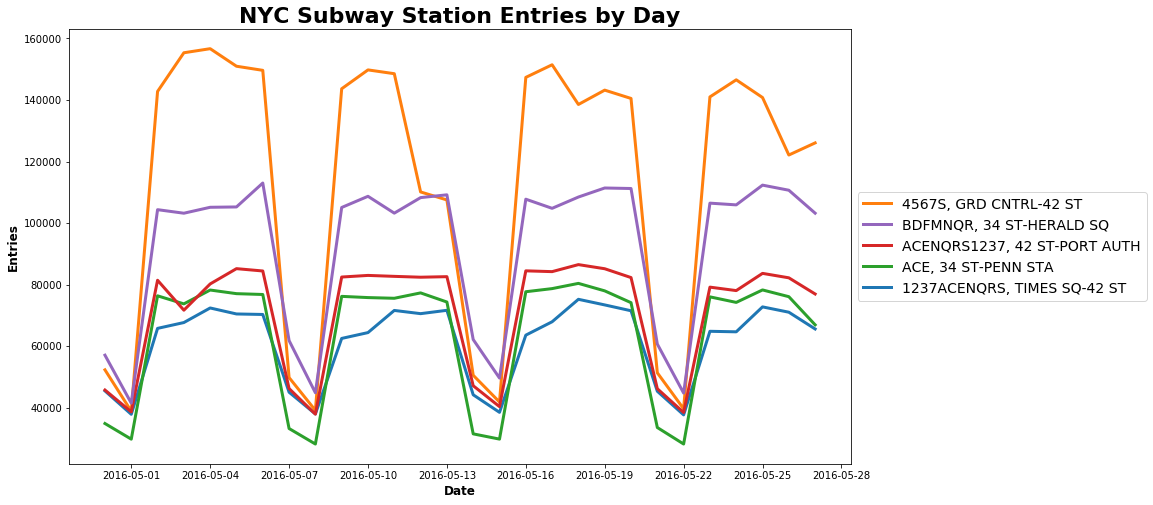

In [65]:
fig = plt.figure(1, figsize = (14, 8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Date', fontsize=12, weight='bold')
ax1.set_ylabel('Entries', fontsize=12, weight='bold')
ax1.set_title('NYC Subway Station Entries by Day', fontsize=22, weight='bold')
busiest_five_stations = busiest_turnstile_df[:5]
for key, grp in busiest_five_stations.groupby(['Linename', 'Station']):
    station = timeseries_df[(timeseries_df['Linename'] == key[0]) & \
                             (timeseries_df['Station'] == key[1])]

    station = station.groupby('Date').sum().reset_index() 
    ax1.plot('Date', 'Entries', data = station, label = key[0] + ', ' + key[1], linewidth=3)

handles,labels = ax1.get_legend_handles_labels()
#print(handles,labels)
handles = [handles[1], handles[4], handles[3], handles[2], handles[0]]
labels = [labels[1], labels[4], labels[3], labels[2], labels[0]]

ax1.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14);